In [18]:
import sqlalchemy as db
engine = db.create_engine("sqlite:///european_database.sqlite")

conn = engine.connect()

In [19]:
from sqlalchemy import MetaData, Table
metadata = MetaData()

In [20]:
division= Table('divisions', metadata, autoload_with=engine)
print(division.columns.keys())

['division', 'name', 'country']


In [21]:
print(repr(metadata.tables['divisions']))

Table('divisions', MetaData(), Column('division', TEXT(), table=<divisions>), Column('name', TEXT(), table=<divisions>), Column('country', TEXT(), table=<divisions>), schema=None)


In [22]:
query = division.select() #SELECT * FROM divisions
print(query)

SELECT divisions.division, divisions.name, divisions.country 
FROM divisions


In [23]:
exe = conn.execute(query) #executing the query
result = exe.fetchmany(5) #extracting top 5 results
print(result)

[('B1', 'Division 1A', 'Belgium'), ('D1', 'Bundesliga', 'Deutschland'), ('D2', '2. Bundesliga', 'Deutschland'), ('E0', 'Premier League', 'England'), ('E1', 'EFL Championship', 'England')]


In [25]:
engine = db.create_engine('sqlite:///datacamp.sqlite')
conn = engine.connect()
metadata = db.MetaData()
Student = db.Table('Student', metadata,
              db.Column('Id', db.Integer(),primary_key=True),
              db.Column('Name', db.String(255), nullable=False),
              db.Column('Major', db.String(255), default="Math"),
              db.Column('Pass', db.Boolean(), default=True)
              )

metadata.create_all(engine)

In [26]:
query = db.insert(Student).values(Id=1, Name='Matthew', Major="English", Pass=True)
Result = conn.execute(query)

In [27]:
query = db.insert(Student)
values_list = [{'Id':'2', 'Name':'Nisha', 'Major':"Science", 'Pass':False},
              {'Id':'3', 'Name':'Natasha', 'Major':"Math", 'Pass':True},
              {'Id':'4', 'Name':'Ben', 'Major':"English", 'Pass':False}]
Result = conn.execute(query,values_list)

In [29]:
query = Student.select()
exe = conn.execute(query)
result = exe.fetchall()
print(result)

[(1, 'Matthew', 'English', True), (2, 'Nisha', 'Science', False), (3, 'Natasha', 'Math', True), (4, 'Ben', 'English', False)]


In [30]:
from sqlalchemy import create_engine,Column,Integer,String,Float,Boolean,ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
engine=create_engine('sqlite:///ecomerce.db', echo=True)
Base= declarative_base()

<ipython-input-30-0f5ba8cc29f9>:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base= declarative_base()


In [31]:
class Customer(Base):
    __tablename__ = 'customers'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    age= Column(Integer)
    gender= Column(String)
    city= Column(String)

In [32]:
class Order(Base):
    __tablename__ = 'orders'
    id = Column(Integer, primary_key=True)
    customer_id = Column(Integer, ForeignKey('customers.id'))
    customer = relationship("Customer", back_populates="orders")
    total_amount = Column(Float)
    discount_applied = Column(Boolean)

In [33]:
Customer.orders = relationship("Order",order_by=Order.id, back_populates="customer")

In [36]:
Base.metadata. create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()

customers = [
Customer(name='Alice', age=30, gender='Female' , city='New York' ),
Customer(name='Bob', age=24, gender='Male' , city='Los Angeles'),
Customer(name='Charlie', age=29, gender='Male' , city='Chicago'),
Customer(name='Diana' , age=34, gender='Female', city='San Francisco')
]
orders = [
Order(customer_id=1, total_amount=200.0, discount_applied=True),
Order(customer_id=1, total_amount=150.0, discount_applied=False),
Order(customer_id=2, total_amount=300.0, discount_applied=True),
Order(customer_id=3, total_amount=100.0, discount_applied=False),
Order(customer_id=4, total_amount=250.0, discount_applied=True)]

session.add_all(customers)
session.add_all(orders)
session.commit()

2024-06-27 16:12:40,013 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-06-27 16:12:40,019 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("customers")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("customers")


2024-06-27 16:12:40,023 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-06-27 16:12:40,028 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("orders")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("orders")


2024-06-27 16:12:40,031 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-06-27 16:12:40,036 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2024-06-27 16:12:40,044 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-06-27 16:12:40,058 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


2024-06-27 16:12:40,063 INFO sqlalchemy.engine.Engine [generated in 0.00024s (insertmanyvalues) 1/4 (ordered; batch not supported)] ('Alice', 30, 'Female', 'New York')


INFO:sqlalchemy.engine.Engine:[generated in 0.00024s (insertmanyvalues) 1/4 (ordered; batch not supported)] ('Alice', 30, 'Female', 'New York')


2024-06-27 16:12:40,066 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


2024-06-27 16:12:40,069 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/4 (ordered; batch not supported)] ('Bob', 24, 'Male', 'Los Angeles')


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 2/4 (ordered; batch not supported)] ('Bob', 24, 'Male', 'Los Angeles')


2024-06-27 16:12:40,071 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


2024-06-27 16:12:40,073 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/4 (ordered; batch not supported)] ('Charlie', 29, 'Male', 'Chicago')


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 3/4 (ordered; batch not supported)] ('Charlie', 29, 'Male', 'Chicago')


2024-06-27 16:12:40,075 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO customers (name, age, gender, city) VALUES (?, ?, ?, ?) RETURNING id


2024-06-27 16:12:40,078 INFO sqlalchemy.engine.Engine [insertmanyvalues 4/4 (ordered; batch not supported)] ('Diana', 34, 'Female', 'San Francisco')


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 4/4 (ordered; batch not supported)] ('Diana', 34, 'Female', 'San Francisco')


2024-06-27 16:12:40,083 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


2024-06-27 16:12:40,085 INFO sqlalchemy.engine.Engine [generated in 0.00029s (insertmanyvalues) 1/5 (ordered; batch not supported)] (1, 200.0, 1)


INFO:sqlalchemy.engine.Engine:[generated in 0.00029s (insertmanyvalues) 1/5 (ordered; batch not supported)] (1, 200.0, 1)


2024-06-27 16:12:40,088 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


2024-06-27 16:12:40,091 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/5 (ordered; batch not supported)] (1, 150.0, 0)


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 2/5 (ordered; batch not supported)] (1, 150.0, 0)


2024-06-27 16:12:40,093 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


2024-06-27 16:12:40,095 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/5 (ordered; batch not supported)] (2, 300.0, 1)


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 3/5 (ordered; batch not supported)] (2, 300.0, 1)


2024-06-27 16:12:40,097 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


2024-06-27 16:12:40,099 INFO sqlalchemy.engine.Engine [insertmanyvalues 4/5 (ordered; batch not supported)] (3, 100.0, 0)


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 4/5 (ordered; batch not supported)] (3, 100.0, 0)


2024-06-27 16:12:40,102 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


INFO:sqlalchemy.engine.Engine:INSERT INTO orders (customer_id, total_amount, discount_applied) VALUES (?, ?, ?) RETURNING id


2024-06-27 16:12:40,104 INFO sqlalchemy.engine.Engine [insertmanyvalues 5/5 (ordered; batch not supported)] (4, 250.0, 1)


INFO:sqlalchemy.engine.Engine:[insertmanyvalues 5/5 (ordered; batch not supported)] (4, 250.0, 1)


2024-06-27 16:12:40,108 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


In [37]:
result = session.query(Customer).join(Order).filter(Order.discount_applied==True).all()
for customer in result:
    print(f'Customer:{customer.name}, City:{customer.city}')


2024-06-27 16:18:25,488 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-06-27 16:18:25,499 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.age AS customers_age, customers.gender AS customers_gender, customers.city AS customers_city 
FROM customers JOIN orders ON customers.id = orders.customer_id 
WHERE orders.discount_applied = 1


INFO:sqlalchemy.engine.Engine:SELECT customers.id AS customers_id, customers.name AS customers_name, customers.age AS customers_age, customers.gender AS customers_gender, customers.city AS customers_city 
FROM customers JOIN orders ON customers.id = orders.customer_id 
WHERE orders.discount_applied = 1


2024-06-27 16:18:25,503 INFO sqlalchemy.engine.Engine [generated in 0.00495s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00495s] ()


Customer:Alice, City:New York
Customer:Bob, City:Los Angeles
Customer:Diana, City:San Francisco


# **Plotnine**

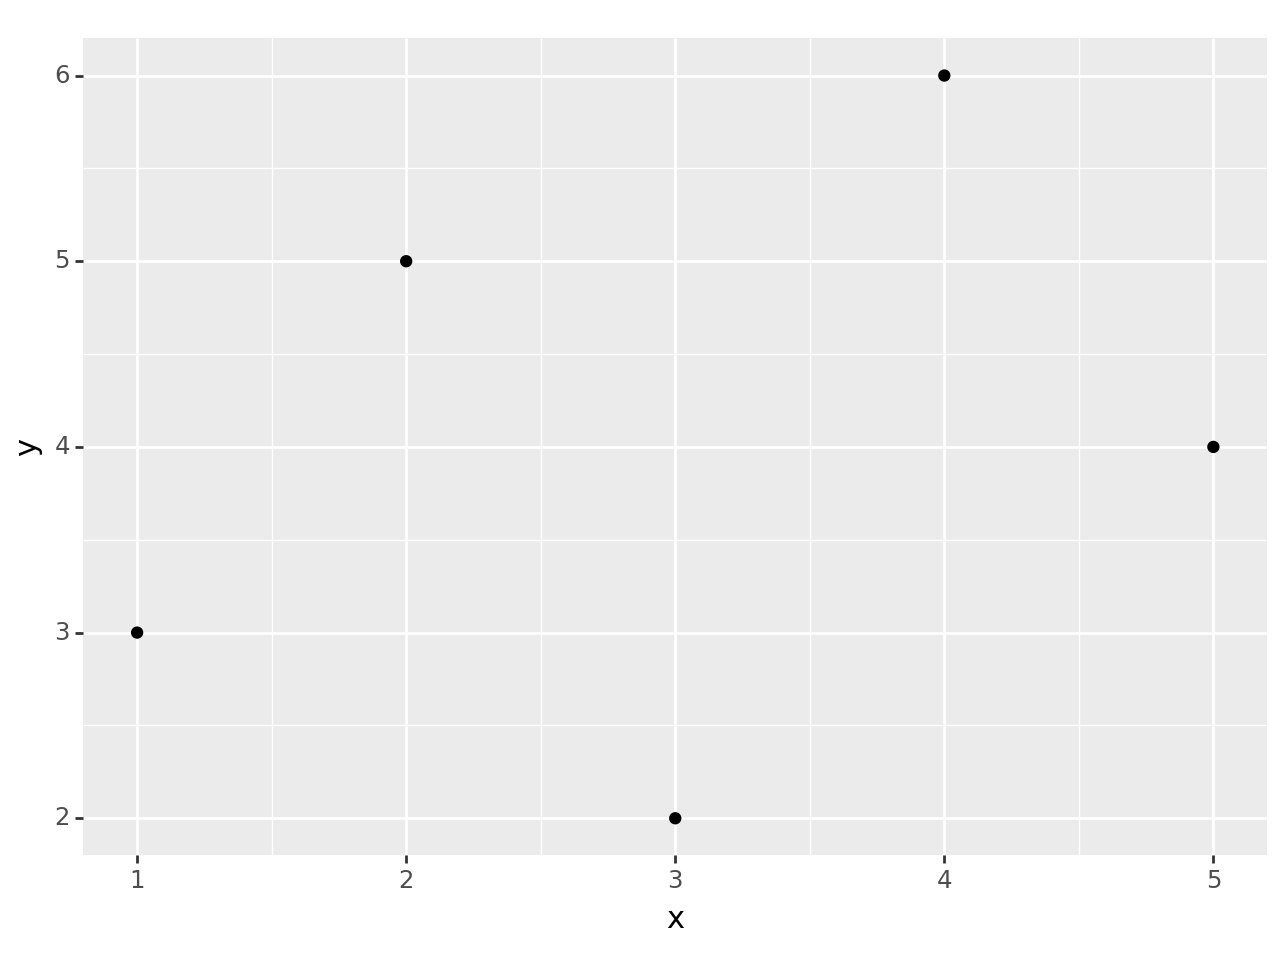

<Figure Size: (640 x 480)>

In [38]:
from plotnine import ggplot, aes, geom_point
import pandas as pd

# Sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [3, 5, 2, 6, 4]})

# Creating a scatter plot
(ggplot(data, aes(x='x', y='y')) + geom_point())

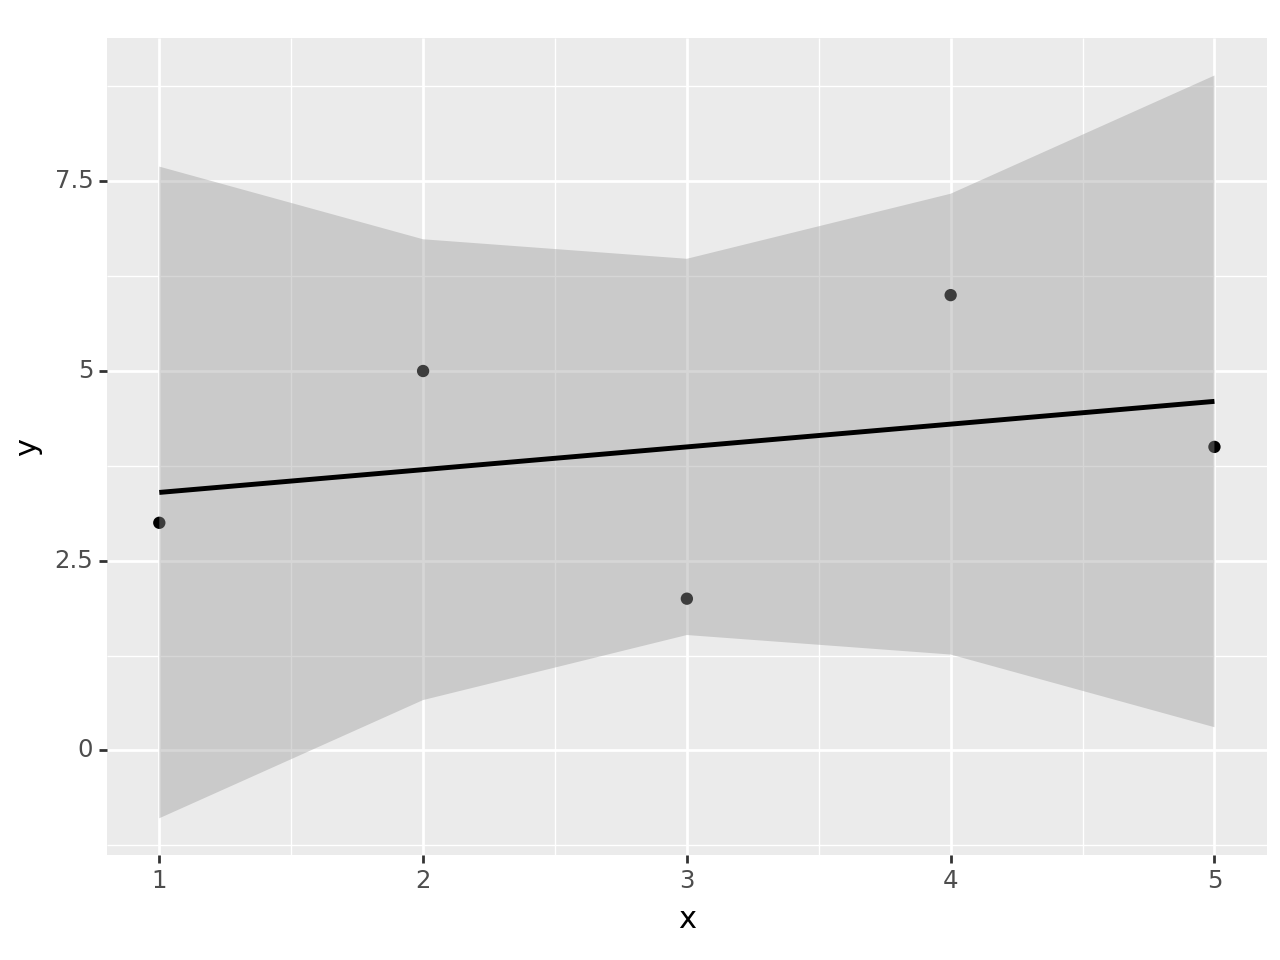

<Figure Size: (640 x 480)>

In [39]:
from plotnine import geom_smooth

# Adding a smooth line layer
(ggplot(data, aes(x='x', y='y')) +
 geom_point() +
 geom_smooth(method='lm'))

/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


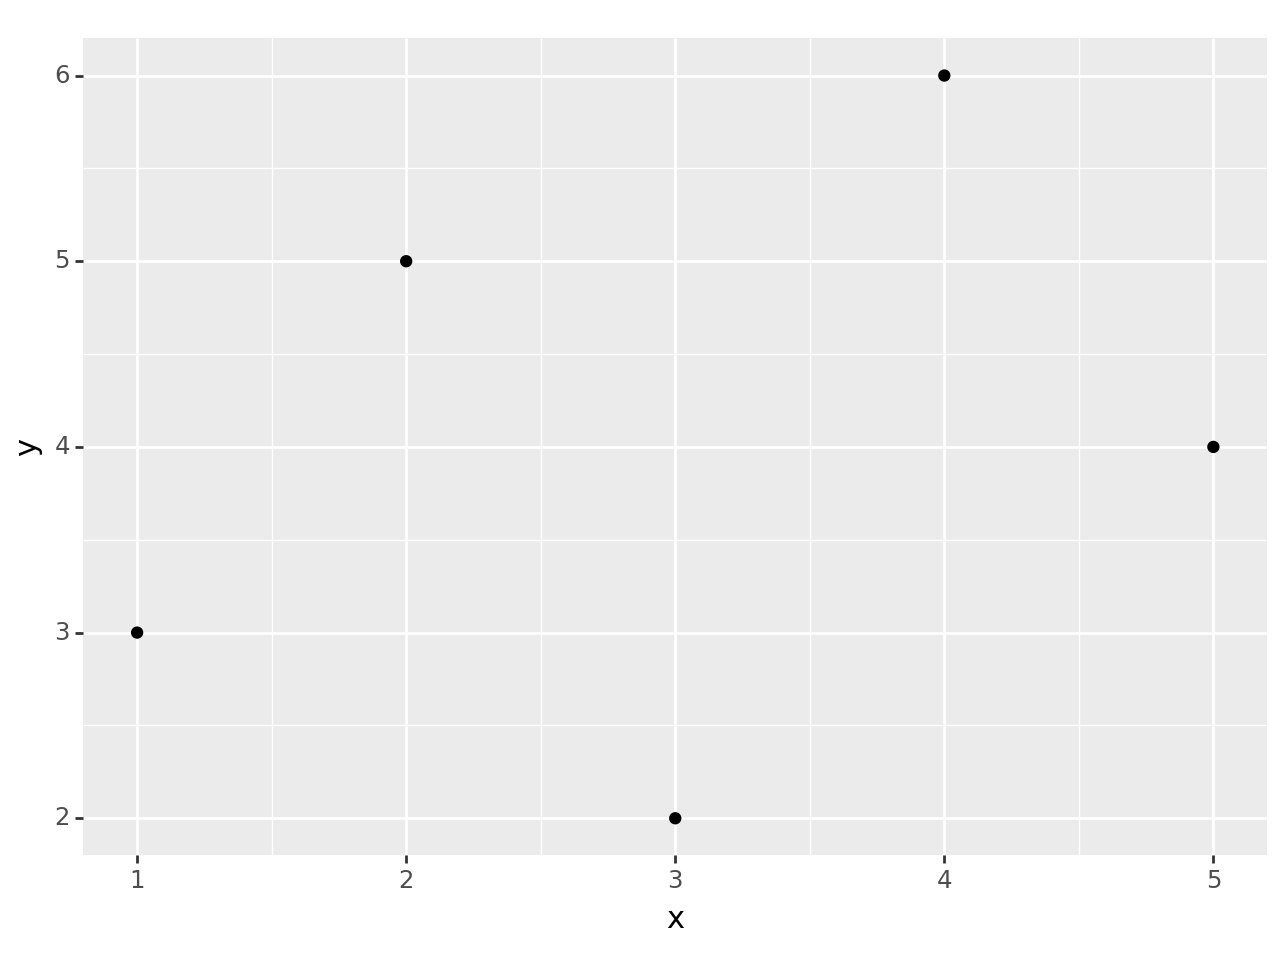

<Figure Size: (640 x 480)>

In [40]:
from plotnine import scale_color_manual

(ggplot(data, aes(x='x', y='y')) +
 geom_point() +
 scale_color_manual(values=["blue", "green", "red"]))

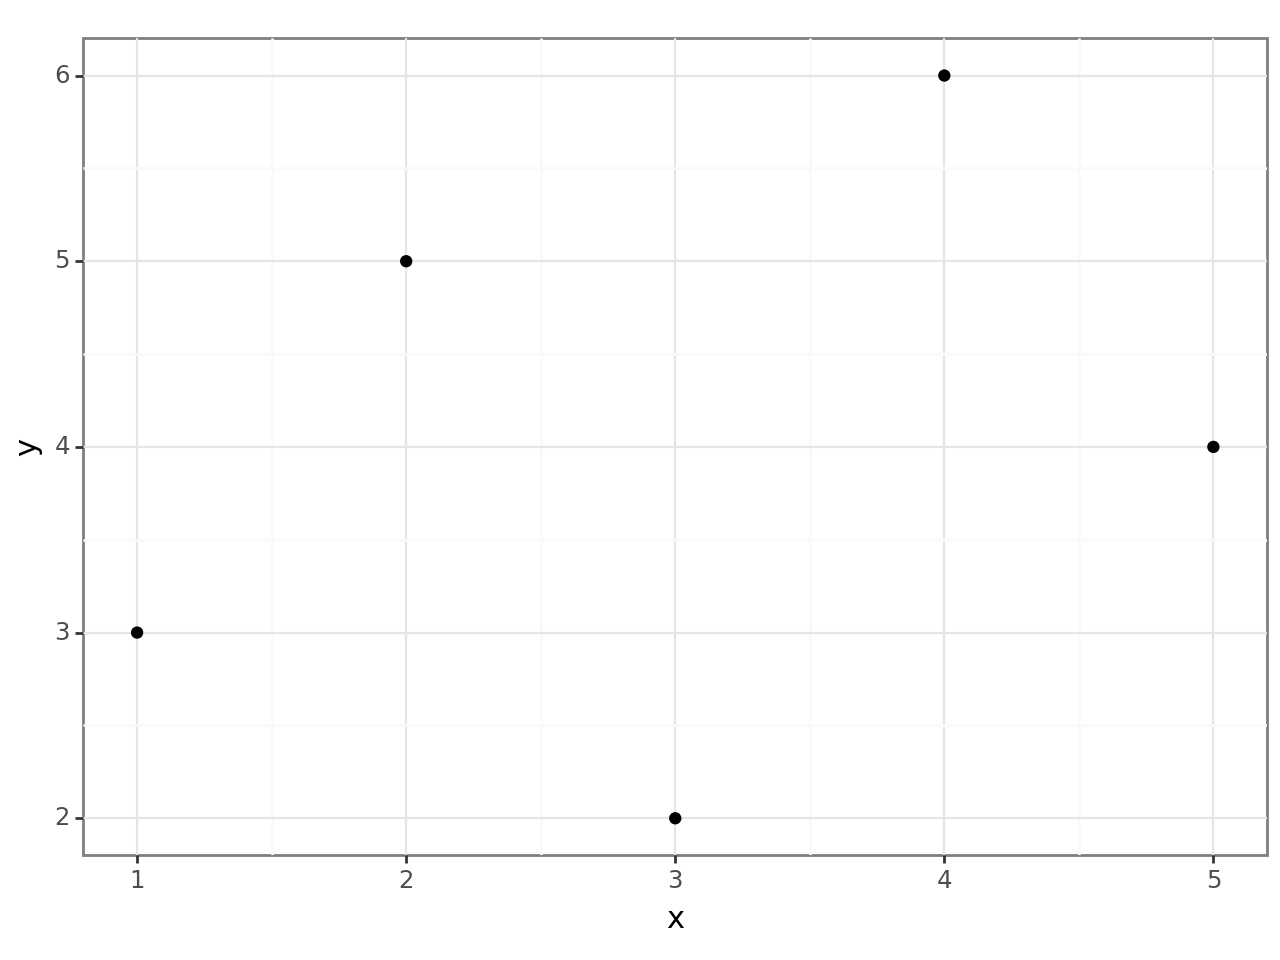

<Figure Size: (640 x 480)>

In [41]:
from plotnine import theme_bw

(ggplot(data, aes(x='x', y='y')) +
 geom_point() +
 theme_bw())

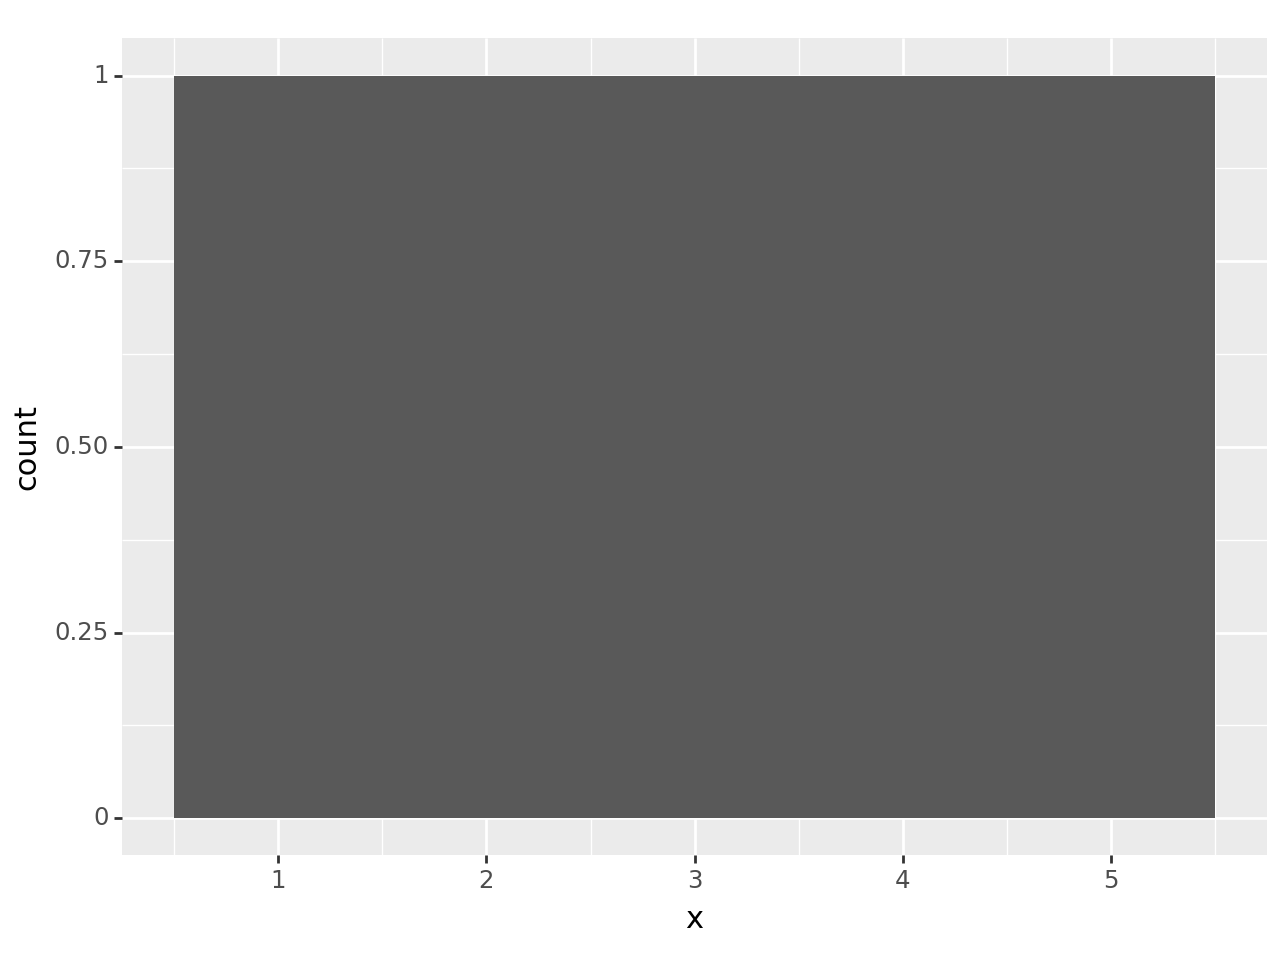

<Figure Size: (640 x 480)>

In [43]:
from plotnine import geom_histogram

(ggplot(data, aes(x='x')) +
 geom_histogram(binwidth=1))

# **Exercise**

In [45]:
import pandas as pd
import numpy as np
# Creating mock data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Product A', 'Product B', 'Product C', 'Product D']
categories = ['Category 1', 'Category 2', 'Category 3']
data_list = []
for date in dates:
    for product in products:
        category = np.random.choice(categories)
        sales = np.random.randint(100, 1000)
        price = np.random.uniform(10, 100)
        quantity = np.random.randint(1, 10)
        data_list.append([date, product, category, sales, price, quantity])
sales_data = pd.DataFrame(data_list, columns=['Date', 'Product', 'Category', 'Sales', 'Price', 'Quantity'])
# Save to CSV
sales_data.to_csv('sales_data.csv', index=False)

In [47]:
from plotnine import *

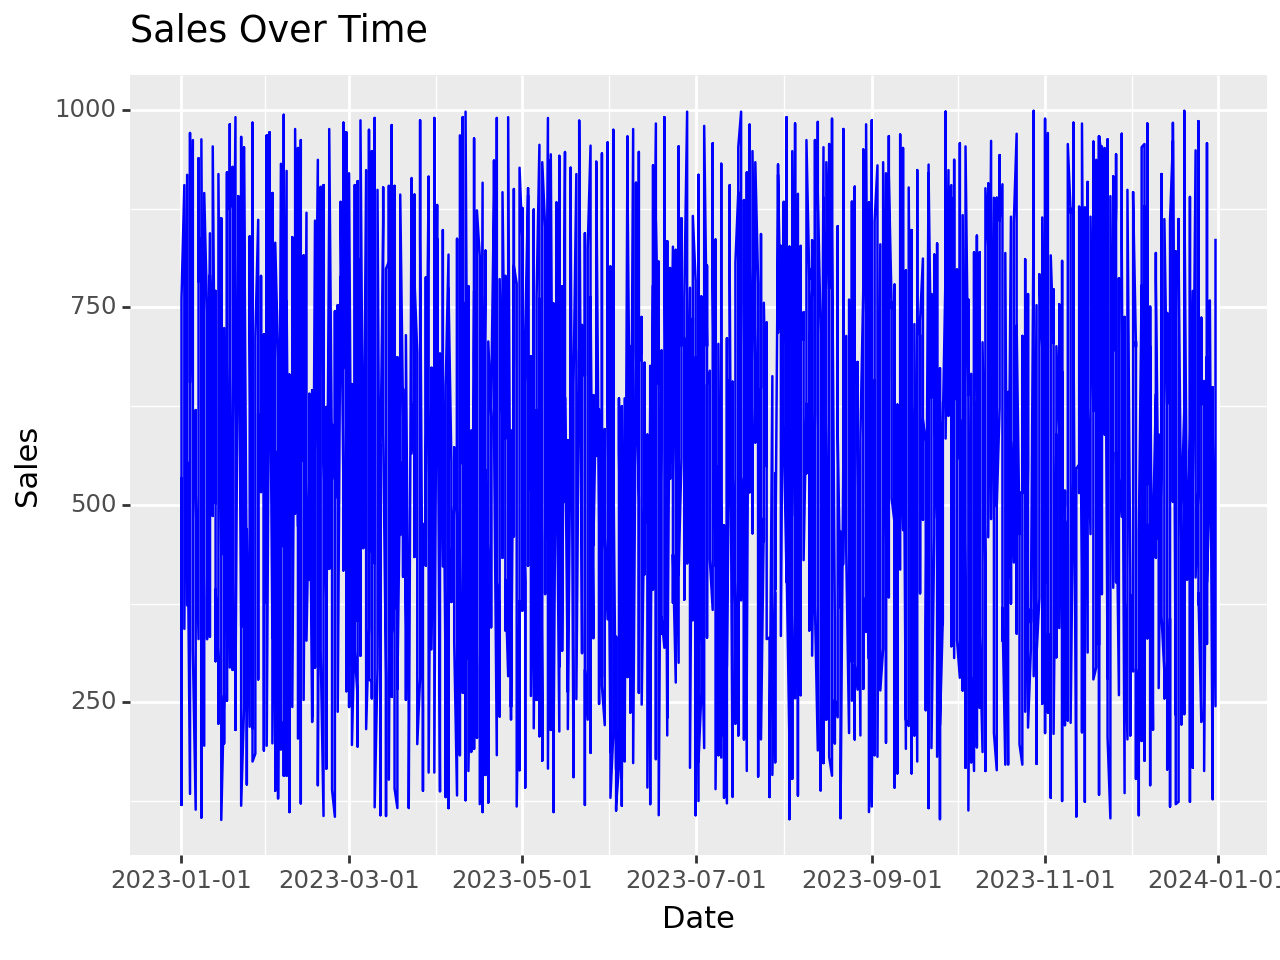

In [66]:
line_plot = (
    ggplot(sales_data, aes(x="Date", y="Sales"))
    + geom_line(color="blue")
    + labs(title="Sales Over Time", x="Date", y="Sales")
)
print(line_plot)

In [68]:
bar_plot= (
    ggplot(data, aes(x="Category", y="Sales"))
    + geom_bar(stat="sum", fill="coral")
    + labs(title="Sales by Product Category", x="Category", y="Total Sales")
)
print(bar_plot)

PlotnineError: "Could not evaluate the 'x' mapping: 'Category' (original error: name 'Category' is not defined)"

# **Plotly**

In [69]:
import plotly.express as px
import pandas as pd

# Sample data
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 11, 12, 13]})

# Creating a line chart
fig = px.line(data, x='x', y='y')
fig.show()

In [70]:
# Creating an interactive scatter plot
fig = px.scatter(data, x='x', y='y', color='y')
fig.show()

In [71]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Creating subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=data['x'], y=data['y']), row=1, col=1)
fig.add_trace(go.Bar(x=data['x'], y=data['y']), row=1, col=2)
fig.show()

In [75]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.8 MB/s eta 0:00:00


In [76]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-76-663c64de5a02>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-76-663c64de5a02>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



<IPython.core.display.Javascript object>